In [8]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [9]:
listeners = [
    
["AddPolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_RETAIL, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_FACTORY, 0],
["AddPolicy", SocialPolicy.LOCKDOWN_OFFICE, 0],
["RemovePolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,120],
["RemovePolicy", SocialPolicy.LOCKDOWN_RETAIL, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_FACTORY, 120],
["RemovePolicy", SocialPolicy.LOCKDOWN_OFFICE,120],
["AddPolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 160],
["AddPolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 160],
["AddPolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 160],
["AddPolicy", SocialPolicy.LOCKDOWN_RETAIL, 160],
["AddPolicy", SocialPolicy.LOCKDOWN_FACTORY, 160],
["AddPolicy", SocialPolicy.LOCKDOWN_OFFICE, 160],
["RemovePolicy", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,205],
["RemovePolicy", SocialPolicy.LOCKDOWN_RETAIL, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_FACTORY, 205],
["RemovePolicy", SocialPolicy.LOCKDOWN_OFFICE,205]

]

In [10]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


Save these seeds if you want to rerun a scenario
[5588, 4926, 6151, 8559, 3612, 1506, 6269, 1306, 387, 8935, 4305, 9297, 7804, 8984, 1935, 6765, 1774, 3528, 272, 7274, 4166, 1391, 1754, 701, 2954, 853, 9071, 7514, 997, 6295]
run with seed 5588:
run with seed 4926:
run with seed 6151:
run with seed 8559:
run with seed 3612:
run with seed 1506:
run with seed 6269:
run with seed 1306:
run with seed 387:
run with seed 8935:
run with seed 4305:
run with seed 9297:
run with seed 7804:
run with seed 8984:
run with seed 1935:
run with seed 6765:
run with seed 1774:
run with seed 3528:
run with seed 272:
run with seed 7274:
run with seed 4166:
run with seed 1391:
run with seed 1754:
run with seed 701:
run with seed 2954:
run with seed 853:
run with seed 9071:
run with seed 7514:
run with seed 997:
run with seed 6295:
using average of time series:
stats on susceptible:
data: [0.9555055555555555, 0.9437833333333332, 0.9529944444444444, 0.7158944444444444, 0.5873305555555556, 0.9469527777777776, 0

(<function dict.items>, <function dict.items>, <function dict.items>)

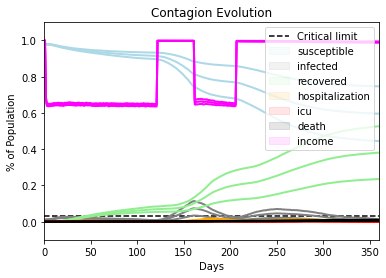

In [11]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong0", do_print = True, listeners = listeners)

 Locality slows down the spread, with parameters home_grid_height = 6, home_grid_width = 6,
                  work_height = 2, work_width =2, school_height=3, school_width=3

Save these seeds if you want to rerun a scenario
[9775, 5585, 4954, 4857, 6684, 1272, 7303, 6117, 8489, 8915, 3489, 4129, 8846, 5501, 2925, 1093, 9024, 8113, 4518, 2300, 9226, 7078, 8548, 9994, 7608, 9229, 4842, 7024, 6381, 4998]
run with seed 9775:
run with seed 5585:
run with seed 4954:
run with seed 4857:
run with seed 6684:
run with seed 1272:
run with seed 7303:
run with seed 6117:
run with seed 8489:
run with seed 8915:
run with seed 3489:
run with seed 4129:
run with seed 8846:
run with seed 5501:
run with seed 2925:
run with seed 1093:
run with seed 9024:
run with seed 8113:
run with seed 4518:
run with seed 2300:
run with seed 9226:
run with seed 7078:
run with seed 8548:
run with seed 9994:
run with seed 7608:
run with seed 9229:
run with seed 4842:
run with seed 7024:
run with seed 6381:
run with seed 4998:
using average of time series:
stats on susceptible:
data: [0.9247893102683523, 0.970225, 0.9220472222222222, 0.9061583333333333, 0.6237055555555555, 0.8801305555555555, 0

(<function dict.items>, <function dict.items>, <function dict.items>)

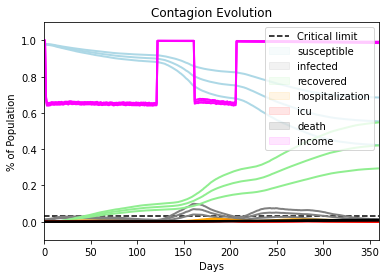

In [12]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds =[5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong1", do_print = True, 
              listeners = listeners, home_grid_height = 6, home_grid_width = 6,
                  work_height = 2, work_width =2, school_height=3, school_width=3)

Save these seeds if you want to rerun a scenario
[3818, 5995, 6500, 7459, 1815, 8219, 6567, 730, 8273, 5622, 6487, 8535, 4208, 9678, 1046, 1060, 8007, 6654, 9564, 439, 3296, 4890, 5752, 6748, 3570, 8426, 1094, 636, 4060, 4216]
run with seed 3818:
run with seed 5995:
run with seed 6500:
run with seed 7459:
run with seed 1815:
run with seed 8219:
run with seed 6567:
run with seed 730:
run with seed 8273:
run with seed 5622:
run with seed 6487:
run with seed 8535:
run with seed 4208:
run with seed 9678:
run with seed 1046:
run with seed 1060:
run with seed 8007:
run with seed 6654:
run with seed 9564:
run with seed 439:
run with seed 3296:
run with seed 4890:
run with seed 5752:
run with seed 6748:
run with seed 3570:
run with seed 8426:
run with seed 1094:
run with seed 636:
run with seed 4060:
run with seed 4216:
using average of time series:
stats on susceptible:
data: [0.7718555555555555, 0.6403305555555556, 0.9660916666666667, 0.9270194444444445, 0.8432499999999999, 0.816877777777777

(<function dict.items>, <function dict.items>, <function dict.items>)

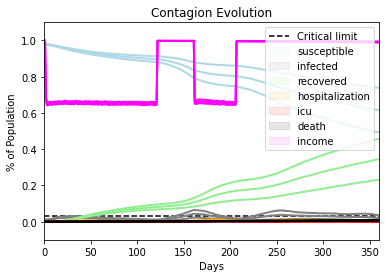

In [13]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong2", do_print = True, 
              listeners = listeners, home_grid_height = 3, home_grid_width = 4,
                  work_height = 1, work_width =2, school_height=2, school_width=1)

Save these seeds if you want to rerun a scenario
[2585, 5815, 2511, 8197, 1554, 1824, 1304, 7402, 7570, 3034, 6428, 9374, 9479, 6372, 1380, 6476, 1972, 2185, 6587, 8939, 4248, 4546, 5347, 9406, 9683, 9767, 1337, 9379, 9097, 4995]
run with seed 2585:
run with seed 5815:
run with seed 2511:
run with seed 8197:
run with seed 1554:
run with seed 1824:
run with seed 1304:
run with seed 7402:
run with seed 7570:
run with seed 3034:
run with seed 6428:
run with seed 9374:
run with seed 9479:
run with seed 6372:
run with seed 1380:
run with seed 6476:
run with seed 1972:
run with seed 2185:
run with seed 6587:
run with seed 8939:
run with seed 4248:
run with seed 4546:
run with seed 5347:
run with seed 9406:
run with seed 9683:
run with seed 9767:
run with seed 1337:
run with seed 9379:
run with seed 9097:
run with seed 4995:
using average of time series:
stats on susceptible:
data: [0.8551611111111113, 0.9381416666666667, 0.9260499999999999, 0.969175, 0.9663888888888889, 0.8873656807355711, 0

(<function dict.items>, <function dict.items>, <function dict.items>)

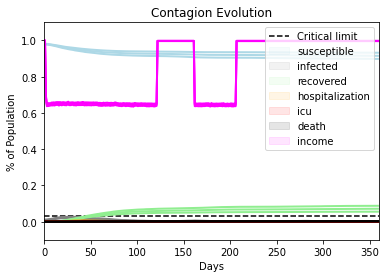

In [14]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong3", do_print = True, 
              listeners = listeners, home_grid_height = 3, home_grid_width = 4,
                  work_height = 1, work_width =1, school_height=1, school_width=1)

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong4", do_print = True, 
              listeners = listeners, home_grid_height = 10, home_grid_width = 10,
                  work_height = 1, work_width =1, school_height=1, school_width=1)

Save these seeds if you want to rerun a scenario
[3068, 751, 8048, 6508, 3547, 7366, 6954, 2795, 4649, 2841, 7501, 6451, 3880, 6467, 1791, 3522, 4324, 6760, 4672, 969, 2562, 7527, 3170, 3472, 8111, 9903, 5753, 5565, 1179, 7012]
run with seed 3068:
run with seed 751:
run with seed 8048:
run with seed 6508:
run with seed 3547:
run with seed 7366:
run with seed 6954:
run with seed 2795:
run with seed 4649:
run with seed 2841:
run with seed 7501:
run with seed 6451:
run with seed 3880:
run with seed 6467:
